In [9]:
import numpy as np # for numerical operations, matrices, etc.
from PIL import Image # pip3 install --user pillow

In [10]:
# going to run the Ising model !
# first, start with a random spin configuration

# Ways to speed this up:
# - vectorize as much as possible: use numpy vector and matrix operations to replace loops
#   e.g. instead of doing a for loop to sum elements, put into a vector and dot with array of 1's
# - use cython: python directives to defer control to actual c programs that can speed
#   things up several hundred times
# - (not when using numpy) use the pypy interpreter, i.e. when using native lists

def spin_field(n, m):
    """Create a random spin field of size n-by-m"""
    return np.random.choice([-1,1], size=(n,m))

def field_image(field):
    """Create an image from field to be displayed"""
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255))

def ising_step(field, T=0.5):
    """Update the board in two phases: even then odd indexes simultaneously"""
    n, m = field.shape
    for n_off in range(2):
        for m_off in range(2):
            for i in range(n_off, n, 2):
                for j in range(m_off, m, 2):
                    ising_particle_step(field, i, j, T)

    return field

def ising_particle_step(field, i, j, T):
    """Do the monte-carlo process for a single particle"""
    # calculate the change in energy if field[i,j] were to flip spin
    # then, if the engergy decreases, we will keep the flip
    # if not, we will keep the flip with probability exp( -dE * T )
    
    total = 0
    n,m = field.shape
    
    for ii in range(i-1,i+2):
        for jj in range(j-1, j+2):
            if ii == i and jj == j:
                continue
            total += field[ii % n, jj % m]
    
    dE = field[i,j] * total
    
    if dE < 0:
        field[i,j] *= -1
    elif np.exp(-dE * T) > np.random.rand():
        field[i,j] *= -1

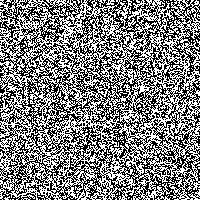

In [11]:
field = spin_field(200,200)
field_image(field)

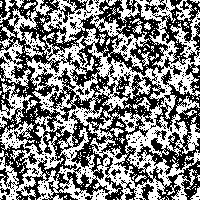

In [12]:
ising_step(field) # has side-effects on the field argument
field_image(field)

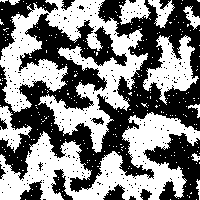

In [13]:
for i in range(10):
    ising_step(field) # has side-effects on the field argument
field_image(field)

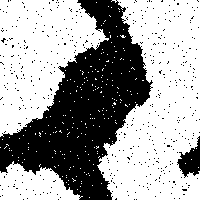

<function __main__.animate_images.<locals>._show(frame=(0, 500))>

In [14]:
from ipywidgets import interact
from tqdm import tqdm

def animate_images(images):
    def _show(frame=(0,len(images)-1)):
        return field_image(images[frame])
    return interact(_show)

images = [spin_field(200,200)]
for i in tqdm(range(500)):
    images.append(ising_step(images[-1].copy()))

animate_images(images)

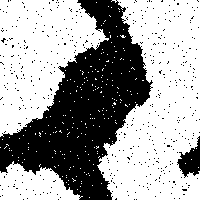

<function __main__.animate_images.<locals>._show(frame=(0, 500))>

In [15]:
animate_images(images)

In [16]:
help(in)

SyntaxError: invalid syntax (2087118897.py, line 1)